In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

RNN gates = sliding windows over candidates.

For LSTM style unbounded gates:
$$
    h_t = p_th_{t-1} + z_t
$$
Suppose $p_i = 0.99$ for $i \in \{1, \dots, 1000\}$, what does the weighting look like at time 1001?

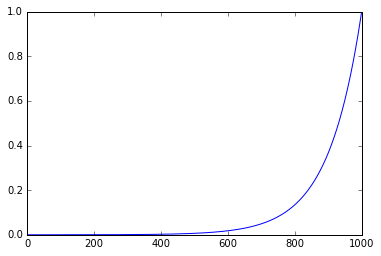

In [18]:
times = np.arange(1000)
window = np.power(0.99, times)[::-1]
plt.plot(window)

What if it fluctuates randomly?

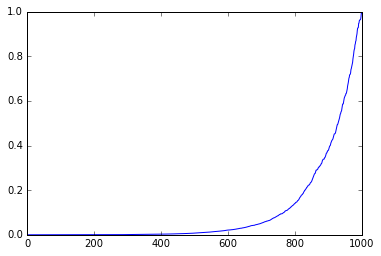

In [12]:
gates = np.random.uniform(0.98, 1.0, size=(1000,))
window = np.cumprod(gates)[::-1]
plt.plot(window)

GRUs (and our new friend) have gates that look like:
$$
    h_t = p_th_{t-1} + (1-p_t)z_t
$$ (although in some GRU papers it's the other way around). This is a little bit more tricky to calculate the sliding window, but that's why we're here.

Give or take a few initial conditions, we can re-write as:
$$
    h_t = \sum_{i=1}^t \left(\prod_{j=i+1}^t p_j\right) (1 - p_i) z_i
$$

0.999956828753


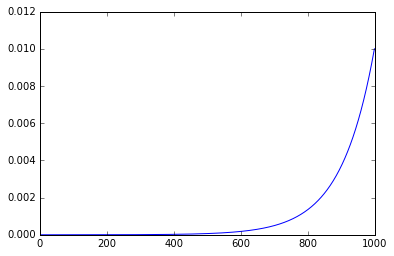

In [16]:
# first let all have the same value
window = np.power(0.99, times)[::-1]
window *= (1 - 0.99)

print(window.sum())
plt.plot(window)

It's the same, but smaller because it sums pretty much to one. But what if it jumps around a bit?

51.448213671559607

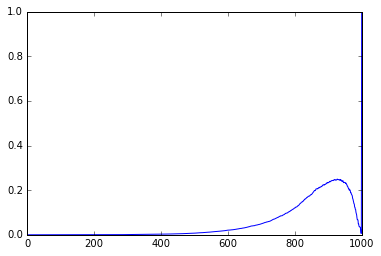

In [23]:
window = np.cumprod(gates)
window[1:] *= 1.0 - window[:-1]
window = window[::-1]

plt.plot(window)
window.sum()
# something wrong